In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [6]:
# Load the training and testing data
train_data = pd.read_csv('Datasets/Fashion_MNIST/fashion-mnist_train.csv/fashion-mnist_train.csv')
test_data = pd.read_csv('Datasets/Fashion_MNIST/fashion-mnist_test.csv/fashion-mnist_test.csv')

In [19]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X_train = train_data.iloc[:, 1:].values  # Assuming the first column is the label
y_train = train_data.iloc[:, 0].values

In [17]:
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values


In [18]:
y_train[0]

2

In [20]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [21]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Define the model
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

In [24]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=2)

Epoch 1/10
750/750 - 32s - 43ms/step - accuracy: 0.7223 - loss: 0.7705 - val_accuracy: 0.8299 - val_loss: 0.4672
Epoch 2/10
750/750 - 39s - 51ms/step - accuracy: 0.8260 - loss: 0.4893 - val_accuracy: 0.8707 - val_loss: 0.3628
Epoch 3/10
750/750 - 24s - 33ms/step - accuracy: 0.8530 - loss: 0.4150 - val_accuracy: 0.8798 - val_loss: 0.3423
Epoch 4/10
750/750 - 17s - 23ms/step - accuracy: 0.8708 - loss: 0.3715 - val_accuracy: 0.8912 - val_loss: 0.3074
Epoch 5/10
750/750 - 19s - 25ms/step - accuracy: 0.8800 - loss: 0.3409 - val_accuracy: 0.8888 - val_loss: 0.3076
Epoch 6/10
750/750 - 16s - 22ms/step - accuracy: 0.8891 - loss: 0.3167 - val_accuracy: 0.9022 - val_loss: 0.2796
Epoch 7/10
750/750 - 14s - 19ms/step - accuracy: 0.8950 - loss: 0.2960 - val_accuracy: 0.8975 - val_loss: 0.2785
Epoch 8/10
750/750 - 16s - 21ms/step - accuracy: 0.9016 - loss: 0.2776 - val_accuracy: 0.9009 - val_loss: 0.2760
Epoch 9/10
750/750 - 18s - 24ms/step - accuracy: 0.9071 - loss: 0.2622 - val_accuracy: 0.9063 - 

In [26]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')

313/313 - 5s - 14ms/step - accuracy: 0.9101 - loss: 0.2522

Test accuracy: 0.91


In [27]:
# Make predictions
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [143]:
# Convert predictions and actual labels from one-hot encoding to integers
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)
y_pred

NameError: name 'predictions' is not defined

In [29]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']))

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.91      0.80      0.85      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.81      0.90      0.85      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.77      0.74      0.75      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



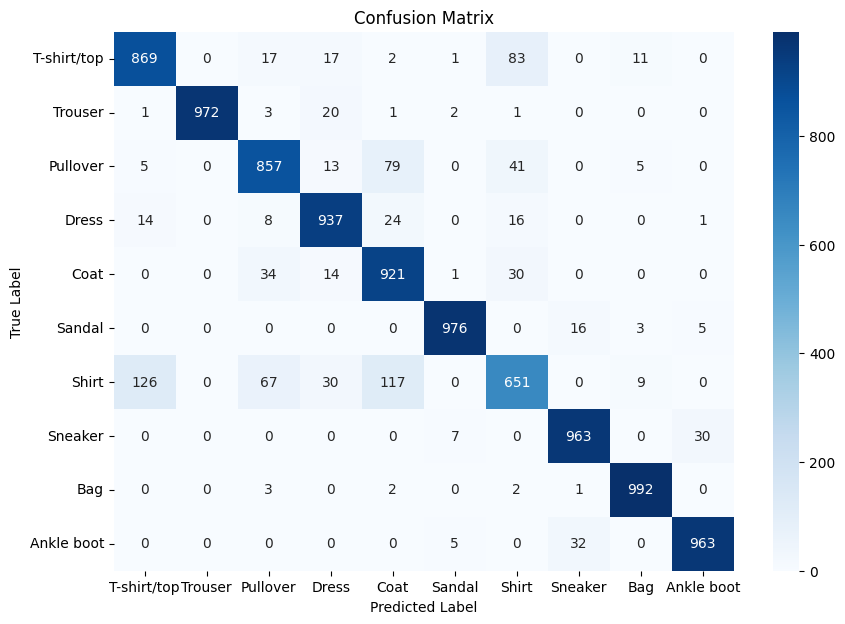

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    yticklabels=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


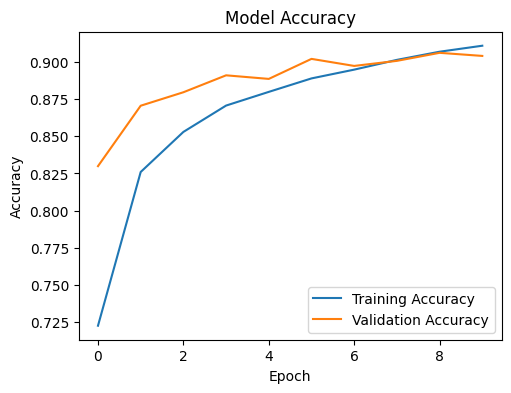

In [30]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


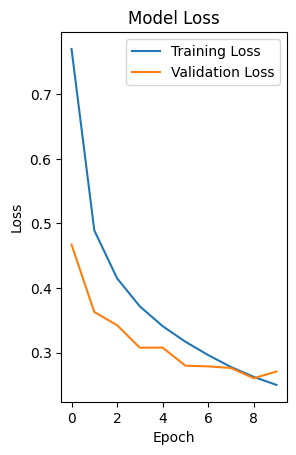

In [31]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

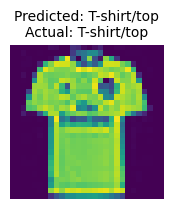

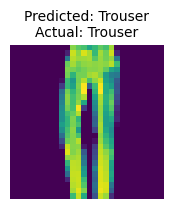

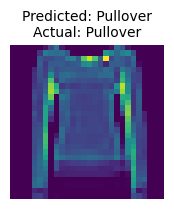

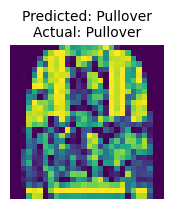

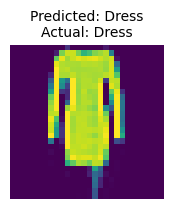

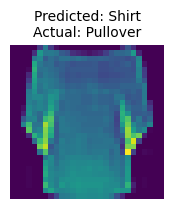

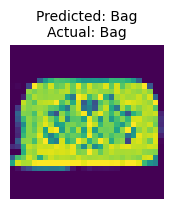

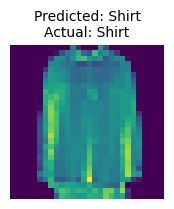

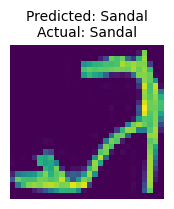

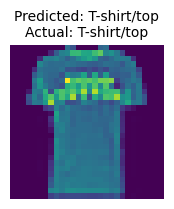

In [32]:
# Display a few test images with predictions
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_images_to_show = 10  # Number of images to display

for i in range(num_images_to_show):
    plt.figure(figsize=(2, 2))

    # Plot the image
    plt.imshow(X_test[i].reshape(28, 28))
    plt.axis('off')  # Hide axes

    # Show the predicted and actual labels
    predicted_label = labels[y_pred[i]]
    actual_label = labels[y_true[i]]
    plt.title(f'Predicted: {predicted_label}\nActual: {actual_label}', fontsize=10)

    plt.show()